In [1]:
import sys
sys.path.append('../')
from _imports import *

import keras

In [2]:
train_X = pd.read_csv('../data/preprocess/train_X.csv').to_numpy()
test_X = pd.read_csv('../data/preprocess/test_X.csv').to_numpy()
train_y = pd.read_csv('../data/preprocess/train_y.csv').iloc[:, 0].to_numpy()

In [3]:
# THESE are not important, only for plotting:
# (can be generated using a simple rf model for example)

train_y_pred = pd.read_csv('../data/predict/train_y.csv').to_numpy()
test_y_pred = pd.read_csv('../data/predict/test_y.csv').to_numpy()

In [4]:
keras.utils.set_random_seed(110)

n_features = train_X.shape[1]
num_features = 32 + 21
bin_features = n_features - num_features

input = keras.layers.Input(shape=(n_features,), name="input")
hidden1 = keras.layers.Dense(
  250, activation="relu",
  kernel_regularizer=keras.regularizers.L1L2(l1=1e-5, l2=1e-4),
  bias_regularizer=keras.regularizers.L2(1e-4),
  activity_regularizer=keras.regularizers.L2(1e-5),
  name="hidden1",
)(input)
hidden2 = keras.layers.Dense(
  25, activation="relu",
  kernel_regularizer=keras.regularizers.L1L2(l1=1e-5, l2=1e-4),
  bias_regularizer=keras.regularizers.L2(1e-4),
  activity_regularizer=keras.regularizers.L2(1e-5),
  name="hidden2",
)(hidden1)
hidden3 = keras.layers.Dense(
  2, activation="sigmoid",
  kernel_regularizer=keras.regularizers.L1L2(l1=1e-5, l2=1e-4),
  bias_regularizer=keras.regularizers.L2(1e-4),
  activity_regularizer=keras.regularizers.L2(1e-5),
  name="hidden3",
)(hidden2)
hidden4 = keras.layers.Dense(
  25, activation="relu",
  kernel_regularizer=keras.regularizers.L1L2(l1=1e-5, l2=1e-4),
  bias_regularizer=keras.regularizers.L2(1e-4),
  activity_regularizer=keras.regularizers.L2(1e-5),
  name="hidden4",
)(hidden3)
hidden5 = keras.layers.Dense(
  250, activation="relu",
  kernel_regularizer=keras.regularizers.L1L2(l1=1e-5, l2=1e-4),
  bias_regularizer=keras.regularizers.L2(1e-4),
  activity_regularizer=keras.regularizers.L2(1e-5),
  name="hidden5",
)(hidden4)
output1 = keras.layers.Dense(num_features, activation="linear", name="output1")(hidden5)
output2 = keras.layers.Dense(bin_features, activation="sigmoid", name="output2")(hidden5)
model = keras.Model(inputs=input, outputs=[output1, output2], name="model")

model.compile(
    loss=[keras.losses.MeanSquaredError(name="MSE"), keras.losses.BinaryCrossentropy(name="CEN")],
    optimizer=keras.optimizers.Adam(),
    metrics=[keras.metrics.MeanAbsoluteError(name="MAE"), keras.metrics.BinaryAccuracy(name="ACC")]
)

history = model.fit(
    train_X,
    [train_X[:, :num_features], train_X[:, num_features:]],
    validation_data=(
      test_X,
      [test_X[:, :num_features], test_X[:, num_features:]],
    ),
    epochs=10,
);

print("train:", model.evaluate(
  train_X,
  [train_X[:, :num_features], train_X[:, num_features:]],
  verbose=0,
))

print("test:", model.evaluate(
  test_X,
  [test_X[:, :num_features], test_X[:, num_features:]],
  verbose=0,
))

Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 12s 187ms/step - loss: 1.7598 - output1_MAE: 0.6698 - output1_loss: 1.0499 - output2_ACC: 0.7835 - output2_loss: 0.6221 - val_loss: 1.2604 - val_output1_MAE: 0.6708 - val_output1_loss: 0.9544 - val_output2_ACC: 0.9301 - val_output2_loss: 0.2349
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.2401 - output1_MAE: 0.6496 - output1_loss: 0.9656 - output2_ACC: 0.9312 - output2_loss: 0.2143 - val_loss: 1.0413 - val_output1_MAE: 0.5838 - val_output1_loss: 0.8141 - val_output2_ACC: 0.9360 - val_output2_loss: 0.1859
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1604 - output1_MAE: 0.5902 - output1_loss: 0.9389 - output2_ACC: 0.9360 - output2_loss: 0.1834 - val_loss: 0.9799 - val_output1_MAE: 0.5682 - val_output1_loss: 0.7733 - val_output2_ACC: 0.9384 - val_output2_loss: 0.1757
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.0499 - output1_MAE: 0.5716 - output1_loss: 0.8445 - output2_ACC: 0.9376 - output2_loss: 0.1757 -

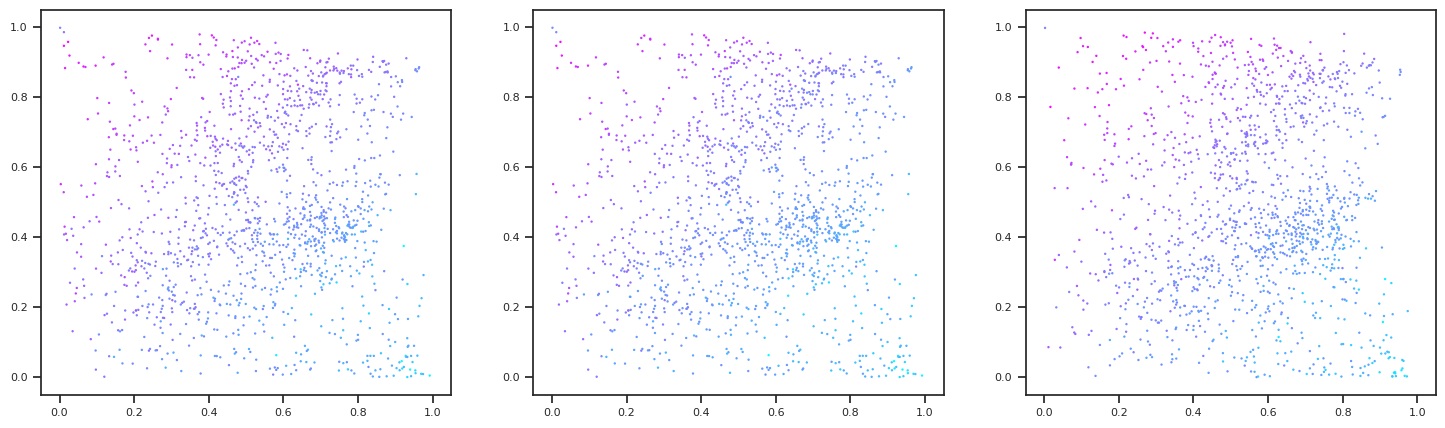

In [5]:
m1 = keras.Model(input, hidden3)

Z = m1.predict(train_X, verbose=0)
Zt = m1.predict(test_X, verbose=0)

plt.figure(figsize=(18, 5))
plt.subplot(1,3,1)
plt.scatter(Z[:,0], Z[:,1], s=2, c=train_y, cmap="cool", marker=".")
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.subplot(1,3,2)
plt.scatter(Z[:,0], Z[:,1], s=2, c=train_y_pred, cmap="cool", marker=".")
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.subplot(1,3,3)
plt.scatter(Zt[:,0], Zt[:,1], s=2, marker=".", c=test_y_pred, cmap="cool")
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.show()

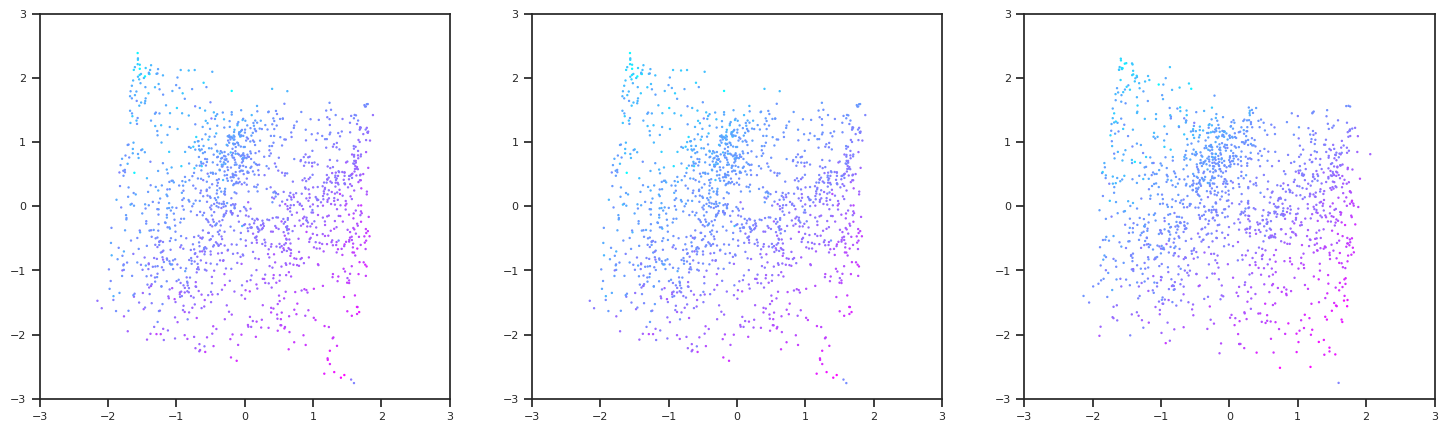

In [6]:
pca = PCA(n_components=2, whiten=True, random_state=1)
Zp = pca.fit_transform(Z)
Ztp = pca.transform(Zt)

plt.figure(figsize=(18, 5))
plt.subplot(1,3,1)
plt.scatter(Zp[:,0], Zp[:,1], s=2, c=train_y, cmap="cool", marker=".")
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.subplot(1,3,2)
plt.scatter(Zp[:,0], Zp[:,1], s=2, c=train_y_pred, cmap="cool", marker=".")
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.subplot(1,3,3)
plt.scatter(Ztp[:,0], Ztp[:,1], s=2, c=test_y_pred, cmap="cool", marker=".")
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()